In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot: >

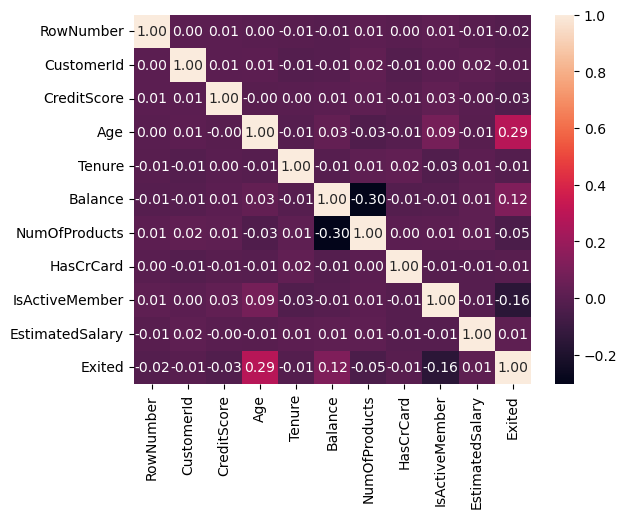

In [4]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df = pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True)

In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
y = df['Exited']
X = df.drop(columns=['Exited'])

In [10]:
sc = StandardScaler()
X_enc = sc.fit_transform(X)

In [11]:
X_enc = pd.DataFrame(X,columns=X.columns)

In [13]:
X_enc.shape

(10000, 11)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_enc,y,test_size=0.2,random_state=50)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [20]:
classifier = Sequential()
classifier.add(Dense(9,activation='relu',input_shape=(11,)))
classifier.add(Dropout(rate = 0.1))
#Add second layer
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
#Add output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [21]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 108       
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_4 (Dense)             (None, 6)                 60        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [24]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [25]:
classifier.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 973us/step - loss: 19112.0703 - accuracy: 0.3248
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 2600.5339 - accuracy: 0.5950
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 1400.3063 - accuracy: 0.6244
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 653.4953 - accuracy: 0.6619
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 415.3472 - accuracy: 0.6695
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 246.9699 - accuracy: 0.6823
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 122.9614 - accuracy: 0.6929
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 75.7338 - accuracy: 0.7219
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 53.6536 - accuracy: 0.7025
Epoch 10/100
250/250 [==============================] - 0s 1ms/step -

250/250 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7956
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.7952
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7956
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 87/100
250/250 [==============================] - 0s 982us/step - loss: 0.5064 - accuracy: 0.7956
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7956
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy

In [26]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


63/63 [==============================] - 0s 1ms/step


In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1598    0]
 [ 402    0]]


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print(accuracy_score(y_test,y_pred))

0.799
